In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
#import json
country_geo = r'C:\Users\cook family\Desktop\Task 6\us-states.json'

In [4]:
station_geo= r'C:\Users\cook family\Desktop\Citi_Bike\02 Data\station_status.json'

In [5]:
city_geo= r'C:\Users\cook family\Desktop\Citi_Bike\02 Data\nyc-zip-code-tabulation-areas-polygons.geojson'

In [6]:
#folder shortcut
path = r'C:\Users\cook family\Desktop\Citi_Bike'

In [15]:
citibike = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citibike_6.2.5.csv'))

In [8]:
citibike.head()

,Unnamed: 0.1,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes
4,4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes


In [18]:
station_counts = citibike.groupby('start_station_id')['start_of_ride'].count().reset_index()

In [19]:
#how many rides occured at that station
station_counts

,start_station_id,start_of_ride
0,72,158
1,79,122
2,82,59
3,83,72
4,116,269
...,...,...
325,2017,90
326,2021,150
327,2022,96
328,2023,74


In [20]:
#how many rides happened each day at each station
station_counts_day = citibike.groupby(['start_station_id', 'day_of_the_week'])['start_of_ride'].count()

In [21]:
station_counts_day

start_station_id  day_of_the_week
72                Fri                31
                  Mon                23
                  Sat                23
                  Sun                25
                  Thu                21
                                     ..
3002              Sat                37
                  Sun                39
                  Thu                20
                  Tue                26
                  Wed                31
Name: start_of_ride, Length: 2276, dtype: int64

In [24]:
station_counts_day.head(10)

start_station_id  day_of_the_week
72                Fri                31
                  Mon                23
                  Sat                23
                  Sun                25
                  Thu                21
                  Tue                16
                  Wed                19
79                Fri                22
                  Mon                15
                  Sat                13
Name: start_of_ride, dtype: int64

In [26]:
station_counts.head(25)

,start_station_id,start_of_ride
0,72,158
1,79,122
2,82,59
3,83,72
4,116,269
5,119,7
6,120,25
7,127,253
8,128,264
9,137,76


In [27]:
station_counts.max()

start_station_id    3002
start_of_ride        475
dtype: int64

In [28]:
station_counts.min()

start_station_id    72
start_of_ride        3
dtype: int64

In [29]:
station_counts.mean()

start_station_id    447.809091
start_of_ride       130.281818
dtype: float64

<Axes: ylabel='Count'>

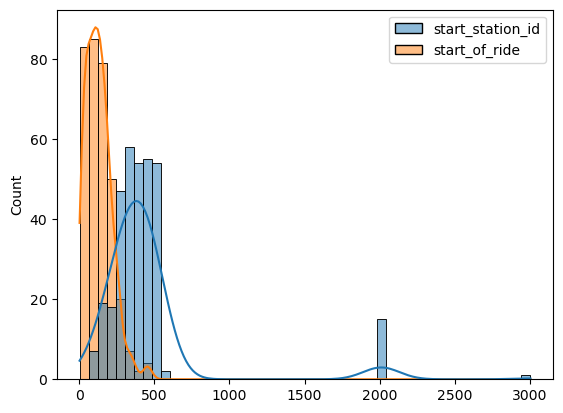

In [30]:
#looking into station counts
sns.histplot(station_counts, bins=50, kde = True) 

In [31]:
# select only needed columns
columns = ["day_of_the_week","start_hour","start_station_id","start_station_longitude","start_station_latitude","start_of_ride"]

In [32]:
citibike_1 = citibike[columns]

In [33]:
citibike_1.head()

,day_of_the_week,start_hour,start_station_id,start_station_longitude,start_station_latitude,start_of_ride
0,Mon,18,523,-73.991382,40.754666,2013-09-09 18:18:00
1,Thu,18,257,-74.002472,40.719392,2013-09-12 18:38:00
2,Wed,19,479,-73.991255,40.760193,2013-09-18 19:44:00
3,Sat,11,527,-73.974347,40.743156,2013-09-28 11:54:00
4,Fri,22,293,-73.990765,40.730287,2013-09-27 22:01:00


In [34]:
type(citibike_1)

pandas.core.frame.DataFrame

In [35]:
citibike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_the_week          42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_longitude  42993 non-null  float64
 4   start_station_latitude   42993 non-null  float64
 5   start_of_ride            42993 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


In [36]:
#Check for missing 
citibike_1.isnull().sum()

day_of_the_week            0
start_hour                 0
start_station_id           0
start_station_longitude    0
start_station_latitude     0
start_of_ride              0
dtype: int64

In [37]:
# Define data types for specific columns
data_types = {
    'rstart_of_ride': 'datetime64'
}

In [38]:
#converting to date time 
file_path = os.path.join(path, '02 Data','prepared data','citibike_6.2.5.csv')

In [39]:
parse_dates = ['ride_start_date']

In [40]:
citibike = pd.read_csv(file_path, parse_dates=parse_dates)

In [41]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.2             42993 non-null  int64         
 1   Unnamed: 0.1             42993 non-null  int64         
 2   Unnamed: 0               42993 non-null  int64         
 3   day_of_the_week          42993 non-null  object        
 4   start_hour               42993 non-null  int64         
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

In [44]:
# Calculate rides per day for each station
station_daily_counts = citibike.groupby(['start_station_id', citibike['ride_start_date'].dt.date])['ride_start_date'].count()

In [46]:
#rides taken each day at each station
station_daily_counts

start_station_id  ride_start_date
72                2013-09-02          3
                  2013-09-03          1
                  2013-09-04          4
                  2013-09-05          8
                  2013-09-06         10
                                     ..
3002              2013-09-26          9
                  2013-09-27          7
                  2013-09-28         12
                  2013-09-29          6
                  2013-09-30          3
Name: ride_start_date, Length: 8667, dtype: int64

In [47]:
station_daily_counts.head(35)

start_station_id  ride_start_date
72                2013-09-02          3
                  2013-09-03          1
                  2013-09-04          4
                  2013-09-05          8
                  2013-09-06         10
                  2013-09-07          6
                  2013-09-08          7
                  2013-09-09          5
                  2013-09-10          7
                  2013-09-11          7
                  2013-09-12          7
                  2013-09-13          7
                  2013-09-14          7
                  2013-09-15          8
                  2013-09-16          4
                  2013-09-17          4
                  2013-09-19          1
                  2013-09-20          6
                  2013-09-21          5
                  2013-09-22          5
                  2013-09-23          6
                  2013-09-24          4
                  2013-09-25          8
                  2013-09-26          5
      

In [48]:
# average rides per day by start station
station_avg_rides_per_day = station_daily_counts.groupby('start_station_id').mean().reset_index()


In [50]:
#checking code
station_avg_rides_per_day

,start_station_id,ride_start_date
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667
...,...,...
325,2017,3.000000
326,2021,5.357143
327,2022,3.310345
328,2023,3.217391


In [51]:
#changing column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'ride_start_date':'average_daily_rides'})

In [53]:
#merging data sets
citibike_1.head()

,day_of_the_week,start_hour,start_station_id,start_station_longitude,start_station_latitude,start_of_ride
0,Mon,18,523,-73.991382,40.754666,2013-09-09 18:18:00
1,Thu,18,257,-74.002472,40.719392,2013-09-12 18:38:00
2,Wed,19,479,-73.991255,40.760193,2013-09-18 19:44:00
3,Sat,11,527,-73.974347,40.743156,2013-09-28 11:54:00
4,Fri,22,293,-73.990765,40.730287,2013-09-27 22:01:00


In [54]:
station_avg_rides_per_day.head()

,start_station_id,average_daily_rides
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667


In [56]:
station_avg_rides_per_day.shape

(330, 2)

In [60]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

In [61]:
# lat and long for each station
station_loc = citibike.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()


In [62]:
station_loc

,start_station_latitude,start_station_longitude
start_station_id,,
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323
116,40.741776,-74.001497
...,...,...
2017,40.750224,-73.971214
2021,40.759291,-73.988597
2022,40.758491,-73.959206


In [63]:
# each station with lat and longitude and avg daily rides
df_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')

In [64]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [67]:
data_to_plot = df_merged[['start_station_id','average_daily_rides',]]
data_to_plot.head()

,start_station_id,average_daily_rides
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667


In [68]:
data_to_plot_1 = df_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.642857
1,-74.006667,40.719116,4.357143
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.571429
4,-74.001497,40.741776,8.966667


In [69]:
df_merged['average_daily_rides'].max()

15.833333333333334

In [70]:
df_merged['average_daily_rides'].mean()

4.609605418741775

<Axes: xlabel='average_daily_rides', ylabel='Count'>

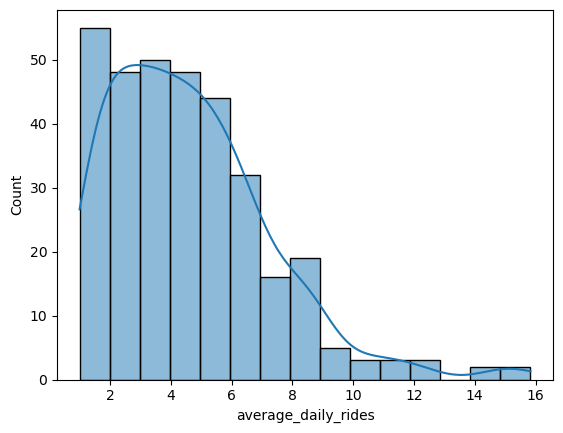

In [71]:
#AVG DAILY RIDES BINS
sns.histplot(df_merged['average_daily_rides'], bins=15, kde = True)

In [72]:
nyc_map

In [97]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [103]:
start_station_id.forEach(station => {
  var marker = new mapboxgl.Marker()
    .setLngLat([start_station) longitude.longitude, start_station_latitude.latitude])
    .addTo(nyc_map);
});

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1644979611.py, line 3)

In [75]:
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.642857
1,-74.006667,40.719116,4.357143
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.571429
4,-74.001497,40.741776,8.966667


In [76]:
data_to_plot_2= df_merged[['start_station_longitude','start_station_latitude']]

In [77]:
data_to_plot_2.head()

,start_station_longitude,start_station_latitude
0,-73.993929,40.767272
1,-74.006667,40.719116
2,-74.000165,40.711174
3,-73.976323,40.683826
4,-74.001497,40.741776


In [78]:
# trying to get lat and long of the zip codes
import folium
from folium.plugins import MarkerCluster

In [79]:
map_zip = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

In [81]:
folium.LayerControl().add_to(map_zip)

In [82]:
map_zip

In [83]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [85]:
df_merged.to_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'))

In [86]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="lightgreen", icon="bicycle")
    ).add_to(map_zip)








In [87]:

# Add a layer control
folium.LayerControl().add_to(map_zip)

In [88]:
map_zip

In [93]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [94]:
area_geojson = r'C:\Users\cook family\Desktop\Citi_Bike\02 Data\nyc-zip-code-tabulation-areas-polygons.geojson'

In [95]:
geojson_gdf = gpd.read_file(area_geojson)

In [96]:
# Convert bike station DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_merged["start_station_longitude"], df_merged["start_station_latitude"])]
bike_stations_gdf = gpd.GeoDataFrame(df_merged, geometry=geometry, crs=geojson_gdf.crs)

In [104]:
# Convert bike station DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_merged["start_station_longitude"], df_merged["start_station_latitude"])]
bike_stations_gdf = gpd.GeoDataFrame(df_merged, geometry=geometry, crs=geojson_gdf.crs)

In [105]:
merged_gdf = gpd.sjoin(bike_stations_gdf, geojson_gdf, predicate="within")

In [106]:
merged_gdf

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,geometry,index_right,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id
0,72,40.767272,-73.993929,5.642857,POINT (-73.99393 40.76727),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
24,173,40.760647,-73.984427,5.233333,POINT (-73.98443 40.76065),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
75,281,40.764397,-73.973715,5.300000,POINT (-73.97371 40.76440),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
138,352,40.763406,-73.977225,5.500000,POINT (-73.97722 40.76341),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
202,422,40.770513,-73.988038,4.620690,POINT (-73.98804 40.77051),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,POINT (-73.98860 40.75929),105,106,10036,New York,NY,Manhattan,36,061,0,16418.606668,1.139511e+07,http://nyc.pediacities.com/Resource/PostalCode...
273,499,40.769155,-73.981918,9.100000,POINT (-73.98192 40.76916),89,90,10023,New York,NY,Manhattan,36,061,0,22471.385989,1.521271e+07,http://nyc.pediacities.com/Resource/PostalCode...
309,538,40.757952,-73.977876,2.965517,POINT (-73.97788 40.75795),110,111,10020,New York,NY,Manhattan,36,061,0,3612.203611,6.972970e+05,http://nyc.pediacities.com/Resource/PostalCode...
320,2006,40.765909,-73.976342,4.482759,POINT (-73.97634 40.76591),82,83,00083,Central Park,NY,Manhattan,36,061,0,32710.772800,3.830099e+07,http://nyc.pediacities.com/Resource/PostalCode...


In [107]:
merged_gdf_1=merged_gdf.drop(columns=["geometry","index_right","OBJECTID","PO_NAME","STATE","borough","ST_FIPS","CTY_FIPS","BLDGpostalCode","Shape_Leng","Shape_Area","@id"])

In [108]:
merged_gdf_1

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019
...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,10036
273,499,40.769155,-73.981918,9.100000,10023
309,538,40.757952,-73.977876,2.965517,10020
320,2006,40.765909,-73.976342,4.482759,00083


In [109]:
nyc_map

In [110]:
choropleth_layer = folium.Choropleth(
    geo_data=area_geojson,
    data=merged_gdf_1,
    columns=["postalCode", "average_daily_rides"],
    key_on="feature.properties.postalCode",  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Daily Use"
).add_to(nyc_map)

In [111]:
nyc_map

In [112]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="blue", icon="bicycle")
    ).add_to(nyc_map)

In [113]:
nyc_map

In [114]:
nyc_map.save('plot_data.html')

In [115]:
citibike.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,18:35:00
1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,18:48:00
2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,19:50:00
3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,12:03:00
4,4,4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,22:08:00


In [117]:
citibike.to_csv(os.path.join(path, '02 Data','prepared data', 'citibike_3.csv'))

In [118]:
merged_gdf_1.head()

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019


In [119]:
merged_gdf_1.to_csv(os.path.join(path, '02 Data','prepared data', 'postalcodes'))

Discuss the results and what they mean in a markdown section

So far I feel i'm making good progress I am able to tell which locations are busiest but I still need to fiqure out more about the age and subscriber stats. 